In [467]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [468]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline

In [469]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7

# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [470]:
NOTEBOOK_NAME = 'aha_find_decode'

In [471]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
# load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [472]:
sessions = ['pre', 'd2']

for sess in sessions:
    exec("vars_%s = {}"%sess)
    folder = '../%s/notebooks/autorestore/preprocessing/'%sess
    try:
        for var in ('events', 'cycles', 'time_ax', 'licks', 'licks_tc', 'licks_cs', 'licks_tc_us', 'licks_bs', 'is_CSmt', 'is_rewardt', 'odor_CSm_ons', 'odor_rw_ons',
                    'CS_DURATION', 'CYCLE_START', 'CYCLE_DURATION', 'DELAY'): 
            eval("vars_%s"%sess).update({var:ut.load_variable(var, folder=folder)})
    except IOError:
        print "Nope %s"%sess

In [473]:
vars_pre['is_rewardt']==vars_d2['is_rewardt']

True

In [474]:
def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m

In [475]:
cum_vals_rew = [];
cum_vals_CSm = [];
cum_vals_rew_tc_us = [];
cum_vals_CSm_tc_us = [];
cum_vals_rew_cs = [];
cum_vals_CSm_cs = [];
cum_vals_rew_bs = [];
cum_vals_CSm_bs = [];

licks_rew_tc_us = []
licks_CSm_tc_us = []
licks_rew_tc = []
licks_CSm_tc = []
licks_rew_cs = []
licks_CSm_cs = []
licks_rew_bs = []
licks_CSm_bs = []

licks_rew_tc.append(vars_pre['licks_tc'][vars_pre['is_rewardt']])
licks_CSm_tc.append(vars_pre['licks_tc'][vars_pre['is_CSmt']])
licks_rew_cs.append(vars_pre['licks_cs'][vars_pre['is_rewardt']])
licks_CSm_cs.append(vars_pre['licks_cs'][vars_pre['is_CSmt']])
licks_rew_tc_us.append(vars_pre['licks_tc_us'][vars_pre['is_rewardt']])
licks_CSm_tc_us.append(vars_pre['licks_tc_us'][vars_pre['is_CSmt']])
licks_rew_bs.append(vars_pre['licks_bs'][vars_pre['is_rewardt']])
licks_CSm_bs.append(vars_pre['licks_bs'][vars_pre['is_CSmt']])

licks_rew_tc.append(vars_d2['licks_tc'][vars_d2['is_rewardt']])
licks_CSm_tc.append(vars_d2['licks_tc'][vars_d2['is_CSmt']])
licks_rew_cs.append(vars_d2['licks_cs'][vars_d2['is_rewardt']])
licks_CSm_cs.append(vars_d2['licks_cs'][vars_d2['is_CSmt']])
licks_rew_tc_us.append(vars_d2['licks_tc_us'][vars_d2['is_rewardt']])
licks_CSm_tc_us.append(vars_d2['licks_tc_us'][vars_d2['is_CSmt']])
licks_rew_bs.append(vars_d2['licks_bs'][vars_d2['is_rewardt']])
licks_CSm_bs.append(vars_d2['licks_bs'][vars_d2['is_CSmt']])

licks_rew_tc = np.concatenate(licks_rew_tc,)
licks_CSm_tc = np.concatenate(licks_CSm_tc,)
licks_rew_cs = np.concatenate(licks_rew_cs,)
licks_CSm_cs = np.concatenate(licks_CSm_cs,)
licks_rew_tc_us = np.concatenate(licks_rew_tc_us,)
licks_CSm_tc_us = np.concatenate(licks_CSm_tc_us,)
licks_rew_bs = np.concatenate(licks_rew_bs,)
licks_CSm_bs = np.concatenate(licks_CSm_bs,)

l_lick= len(licks_rew_tc)
for i in range(l_lick):
    if i!=0: 
        cum_vals_rew.append(np.sum(licks_rew_tc[0:i]))
        cum_vals_CSm.append(np.sum(licks_CSm_tc[0:i]))
        cum_vals_rew_tc_us.append(np.sum(licks_rew_tc_us[0:i]))
        cum_vals_CSm_tc_us.append(np.sum(licks_CSm_tc_us[0:i]))
        cum_vals_rew_cs.append(np.sum(licks_rew_cs[0:i]))
        cum_vals_CSm_cs.append(np.sum(licks_CSm_cs[0:i]))
        cum_vals_rew_bs.append(np.sum(licks_rew_bs[0:i]))
        cum_vals_CSm_bs.append(np.sum(licks_CSm_bs[0:i]))
    else:
        cum_vals_rew.append(np.sum(licks_rew_tc[0]))
        cum_vals_CSm.append(np.sum(licks_CSm_tc[0]))
        cum_vals_rew_cs.append(np.sum(licks_rew_cs[0]))
        cum_vals_CSm_cs.append(np.sum(licks_CSm_cs[0]))
        cum_vals_rew_bs.append(np.sum(licks_rew_bs[0]))
        cum_vals_CSm_bs.append(np.sum(licks_CSm_bs[0]))
        cum_vals_rew_tc_us.append(np.sum(licks_rew_tc_us[0]))
        cum_vals_CSm_tc_us.append(np.sum(licks_CSm_tc_us[0]))
            
rew_csm_diff = []
rew_bin = []
csm_bin = []

avg_bin = 4 ## this is number of trials to average over

for i in range(len(cum_vals_rew)/avg_bin):
    if i==0:
        rew_csm_diff.append(np.mean(cum_vals_rew[i:i+avg_bin])-np.mean(cum_vals_CSm[i:i+avg_bin]))
        rew_bin.append(np.mean(cum_vals_rew[i:i+avg_bin]))
        csm_bin.append(np.mean(cum_vals_CSm[i:i+avg_bin]))
    elif i<len(cum_vals_rew)-1:
        rew_csm_diff.append(np.mean(cum_vals_rew[i*avg_bin:(i+1)*avg_bin])-np.mean(cum_vals_CSm[i*avg_bin:(i+1)*avg_bin]))
        rew_bin.append(np.mean(cum_vals_rew[i*avg_bin:(i+1)*avg_bin]))
        csm_bin.append(np.mean(cum_vals_CSm[i*avg_bin:(i+1)*avg_bin]))
            
y_rew_bin=[]
for i in range(len(rew_bin)):
    y_rew_bin.append(max(rew_bin))

slope_vals_diff_bin = []
slope_sd_diff_bin=[]
slope_sd_ch_diff_bin=[]
for i in range(len(rew_bin)):
    if i<len(rew_bin)-1:
        slope_vals_diff_bin.append(slope(i,(rew_bin[i]-csm_bin[i]),i+1,(rew_bin[i+1]-csm_bin[i+1])))
    if i!=0 and i<len(rew_bin)-1:
        slope_sd_diff_bin.append(np.std(slope_vals_diff_bin[0:i]))
        
for i in range(len(rew_bin)):
    if i> avg_bin and i<len(rew_bin)-1:
        if i<=len(rew_bin)/2 and cum_vals_rew[len(cum_vals_rew)/2]>=80:
            if slope_vals_diff_bin[i-1]>(slope_sd_diff_bin[i-1]+np.mean(np.absolute(slope_vals_diff_bin[0:i]))):
                if i<= len(rew_bin)*(3/4):
                    if slope_vals_diff_bin[i] - slope_vals_diff_bin[i-1] >= (slope_vals_diff_bin[-1] - slope_vals_diff_bin[-3])/3: 
                        slope_sd_ch_diff_bin.append(i)
                else:
                    slope_sd_ch_diff_bin.append(i)
        elif i>len(rew_bin)/2:
            if slope_vals_diff_bin[i-1]>(slope_sd_diff_bin[i-1]+np.mean(np.absolute(slope_vals_diff_bin[0:i]))):
                if i<= len(rew_bin)*(3/4):
                    if slope_vals_diff_bin[i] - slope_vals_diff_bin[i-1] >= (slope_vals_diff_bin[-1] - slope_vals_diff_bin[-3])/3: 
                        slope_sd_ch_diff_bin.append(i)
                else:
                    slope_sd_ch_diff_bin.append(i)

y_slope_diff_bin=[]
for i in range(len(slope_sd_ch_diff_bin)):
    y_slope_diff_bin.append(max(cum_vals_rew))
            
        

In [476]:
cum_vals_rew[60]

22.0

In [477]:
len(rew_bin)

30

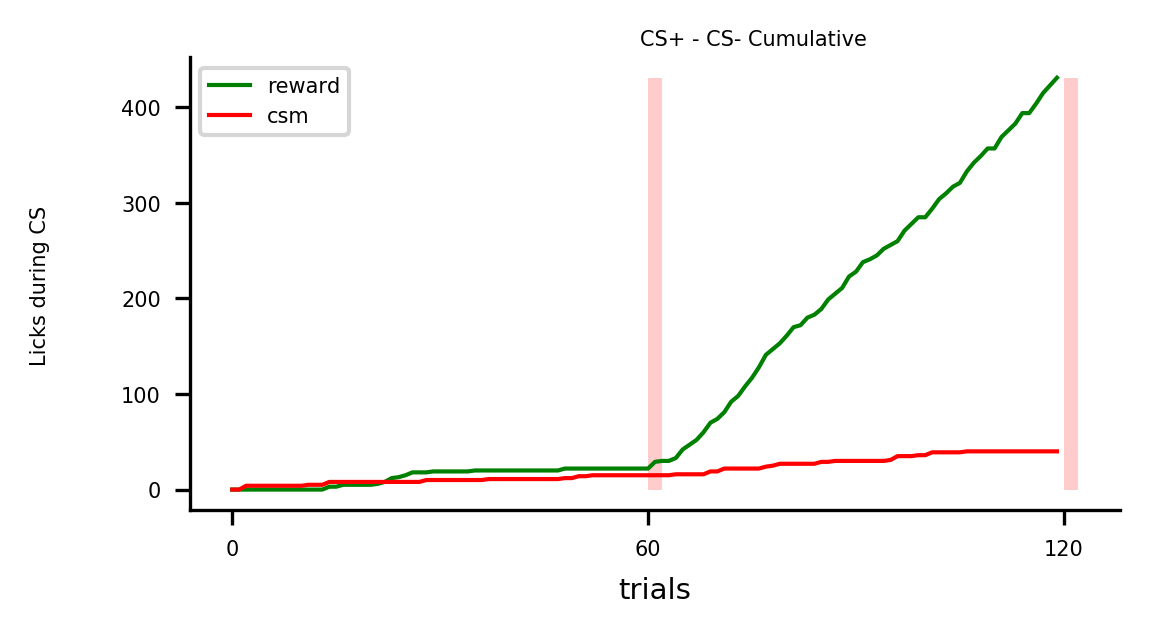

In [478]:
fig, axs = pl.subplots(1, 1, figsize=(4, 2), sharex=True)
[axs.plot(cum_vals_rew, 'g', lw=1)]
[axs.plot(cum_vals_CSm, 'r', lw=1)]

ax=axs
pt.nicer_plot(ax)
ax.set_xticks([0,60,120,])
pt.plot_period_bar(ax, 0, color='r', start_end=(60, 62), alpha=0.2, zorder=1, delta_y=np.max(cum_vals_rew))
pt.plot_period_bar(ax, 0, color='r', start_end=(120, 122), alpha=0.2, zorder=1, delta_y=np.max(cum_vals_rew))
    
axs.legend(['reward', 'csm'], fontsize=5)

fig.text(.5,.9,'CS+ - CS- Cumulative')
fig.text(0, 0.5, 'Licks during CS', rotation=90, ha='center', va='center')
axs.set_xlabel('trials')


In [479]:
slope_sd_ch_diff_bin[0:-1]

[16, 17, 18, 19, 20, 21, 22, 23, 26, 27]

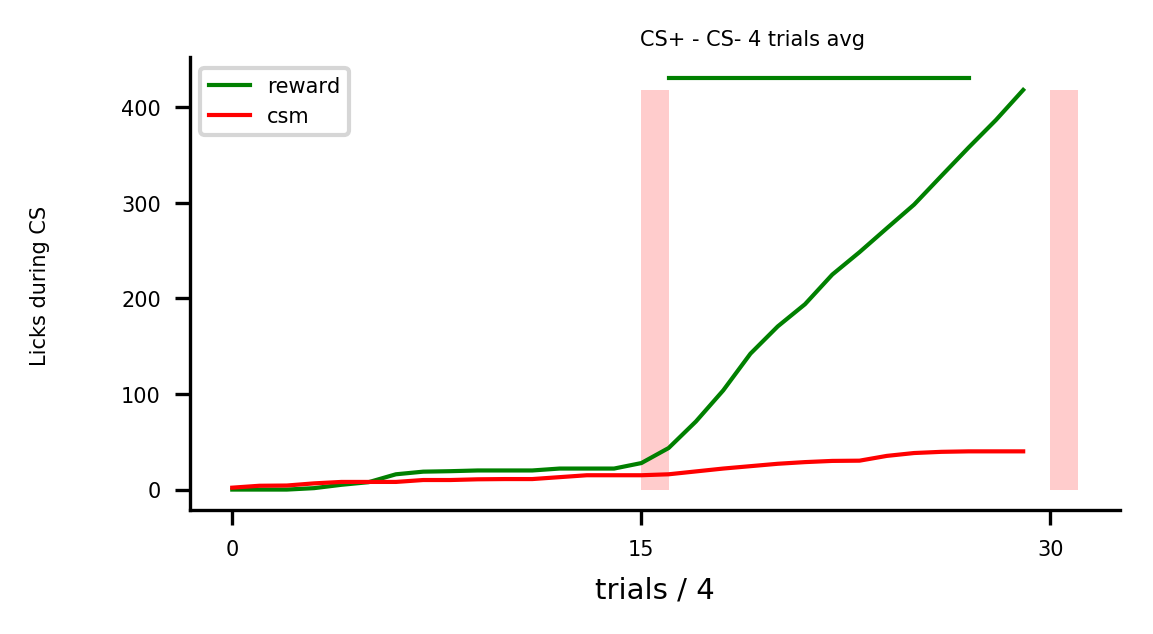

In [480]:
fig, axs = pl.subplots(1, 1, figsize=(4, 2), sharex=True)
[axs.plot(rew_bin, 'g', lw=1)]
[axs.plot(csm_bin, 'r', lw=1)]
[axs.plot(slope_sd_ch_diff_bin[0:-1],y_slope_diff_bin[0:-1], 'g', lw=1)]

#[ax.plot(rew_csm_diff[m], 'b', lw=1) for ax, m in zip(axs, all_animals)]

ax=axs
pt.nicer_plot(ax)
ax.set_xticks([0,60/avg_bin, 120/avg_bin])
pt.plot_period_bar(ax, 0, color='r', start_end=(60/avg_bin, 60/avg_bin + 1), alpha=0.2, zorder=1, delta_y=np.max(rew_bin))
pt.plot_period_bar(ax, 0, color='r', start_end=(120/avg_bin, 120/avg_bin +1 ), alpha=0.2, zorder=1, delta_y=np.max(rew_bin))
   
axs.legend(['reward', 'csm'], fontsize=5)

fig.text(.5,.9,'CS+ - CS- %s trials avg'%(avg_bin))
fig.text(0, 0.5, 'Licks during CS', rotation=90, ha='center', va='center')
axs.set_xlabel('trials / '+str(avg_bin))


In [481]:
found = slope_sd_ch_diff_bin[0] * avg_bin

In [482]:

found

64

In [483]:
f_c = 0
ind = 0
if found <= 60:
    for i in range(len(vars_pre['is_rewardt'])):
        if ind == 0 and vars_pre['is_rewardt'][i]:
            f_c = f_c + 1
        if f_c == found and ind == 0:
            ind = i
            print ind
elif found>60 and found<=120:
    for i in range(len(vars_d2['is_rewardt'])):
        if ind == 0 and vars_d2['is_rewardt'][i]:
            f_c = f_c + 1
        if f_c == found-60 and ind == 0:
            ind = i +120
            print ind
    
found_ind = ind + 1

127


In [484]:
## so I'm going to do decoding in 1 second timebins at 10, 20, 30, 40, trials out
## and then decoding in time in 10 trial windows starting 40 before and ending 40 after
## 

In [485]:
from sklearn.svm import LinearSVC

decodor = LinearSVC()
delta_t0 = 1

t_start0 = -5  # sec
t_stop0 = 11  # sec

In [486]:
vars_d2['is_rewardt'] == vars_pre['is_rewardt']

True

In [487]:
vars_pre['events'].shape

(8520, 53)

In [488]:
vars_d2['events'].shape

(8520, 57)

In [489]:
p_r = vars_pre['is_rewardt']
p_m = vars_pre['is_CSmt']
d_r = vars_d2['is_rewardt']
d_m = vars_d2['is_CSmt']

cum_is_rew = np.concatenate([p_r,d_r])
cum_is_csm = np.concatenate([p_m,d_m])

labels = (np.r_[cum_is_rew] * 0) + (np.r_[cum_is_csm] * 1)

temp_ax = []
for i in range(len(vars_d2['time_ax'])):
    temp_ax.append(vars_pre['time_ax'][-1]+vars_d2['time_ax'][i])
cum_time_ax = np.concatenate([vars_pre['time_ax'],temp_ax])

temp_cyc = []
for i in range(len(vars_d2['cycles'])):
    temp_cyc.append([vars_pre['cycles'][-1,1]+vars_d2['cycles'][i,0],vars_pre['cycles'][-1,1]+vars_d2['cycles'][i,1]])
cum_cycles = np.concatenate([vars_pre['cycles'],temp_cyc])



In [490]:
if found_ind >= 90 and found_ind <= 150:
    import h5py
    filepath = '../data/cellreg_preVSd2.mat'
    arrays = {}
    f = h5py.File(filepath)
    cellreg_map = np.array(f['cell_registered_struct']['cell_to_index_map'])-1
    keep = np.prod(cellreg_map, 0)>0
    cellregs = dict(zip(['pre', 'd2'], cellreg_map.T[keep].T.astype(int)))
    
    cum_events = np.zeros([len(vars_pre['events'][:,cellregs['pre']])+len(vars_d2['events'][:,cellregs['d2']]),np.max([vars_pre['events'][:,cellregs['pre']].shape[1],vars_d2['events'][:,cellregs['d2']].shape[1]])])
    cum_events[0:len(vars_pre['events']),0:vars_pre['events'].shape[1]]= vars_pre['events'][:,cellregs['pre']]
    cum_events[len(vars_pre['events']):len(vars_d2['events'])+len(vars_pre['events']),0:vars_d2['events'].shape[1]]= vars_d2['events'][:,cellregs['d2']]

    
else:
    
    
    cum_events = np.zeros([len(vars_pre['events'])+len(vars_d2['events']),np.max([vars_pre['events'].shape[1],vars_d2['events'].shape[1]])])
    cum_events[0:len(vars_pre['events']),0:vars_pre['events'].shape[1]]= vars_pre['events']
    cum_events[len(vars_pre['events']):len(vars_d2['events'])+len(vars_pre['events']),0:vars_d2['events'].shape[1]]= vars_d2['events']

In [491]:
loop_opt = [10,20,30,]

patterns_tb = np.r_[[ut.extract_activity(cum_time_ax, cum_events, cum_cycles, vars_pre['CYCLE_START'], i*delta_t0, (i+1)*delta_t0,
                                      offset=t_start0)
                     for i in xrange(int((t_stop0-t_start0)/delta_t0))]]
which_trials = [True] * len(labels)  # all odors and air
    # which_trials = (labels==1) * (labels==5)  # only air and banana

labels_tb = np.r_[[[l]*patterns_tb.shape[0] for l in labels]].T
from sklearn.model_selection import cross_val_score, LeaveOneOut

for loo in loop_opt:
    exec('scores_b_%s=[]')%(loo)
    exec('scores_a_%s=[]')%(loo)
    for i, (p, l) in enumerate(zip(patterns_tb, labels_tb)):
    # for every time bin
        exec('scores_b_%s.append(cross_val_score(decodor, p[found_ind-loo:found_ind], l[found_ind-loo:found_ind], cv=LeaveOneOut()))')%(loo)
        exec('scores_a_%s.append(cross_val_score(decodor, p[found_ind:found_ind+loo], l[found_ind:found_ind+loo], cv=LeaveOneOut()))')%(loo)
    # scores_tb3.append(scores_tb3)
    exec('scores_b_%s = np.r_[scores_b_%s]')%(loo,loo)
    exec('scores_a_%s = np.r_[scores_a_%s]')%(loo,loo)

In [492]:
patterns_tb.shape

(16, 240, 24)

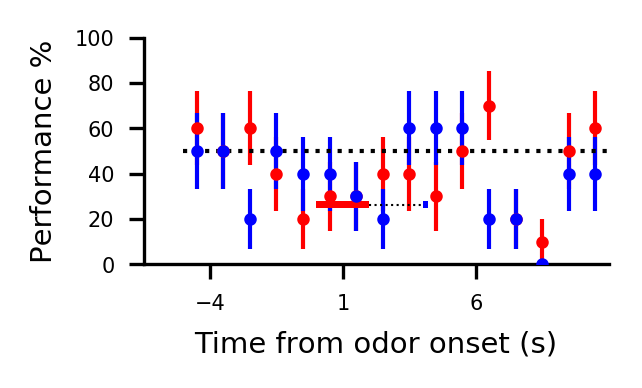

In [493]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
ax.plot(t+np.diff(t)[0]/2., scores_b_10.mean(1)*100, 'ro', lw=.5, zorder=19,ms=2)
m = scores_b_10.mean(1)*100
s = np.std(scores_b_10, 1)*100 / np.sqrt(scores_b_10.shape[1]-1)
ax.errorbar(t+np.diff(t)[0]/2., m, s, lw=0, zorder=0, color= 'r', elinewidth=1)

ax.plot(t+np.diff(t)[0]/2., scores_a_10.mean(1)*100, 'bo', lw=.5, zorder=19,ms=2)
m = scores_a_10.mean(1)*100
s = np.std(scores_a_10, 1)*100 / np.sqrt(scores_a_10.shape[1]-1)
ax.errorbar(t+np.diff(t)[0]/2., m, s, lw=0, zorder=0, color= 'b', elinewidth=1)

ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(t_start0+1, t_stop0, 5))
ax.hlines(50, t_start0, t_stop0, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')



# fig.savefig('img/proposal_decoding_timebased.svg')

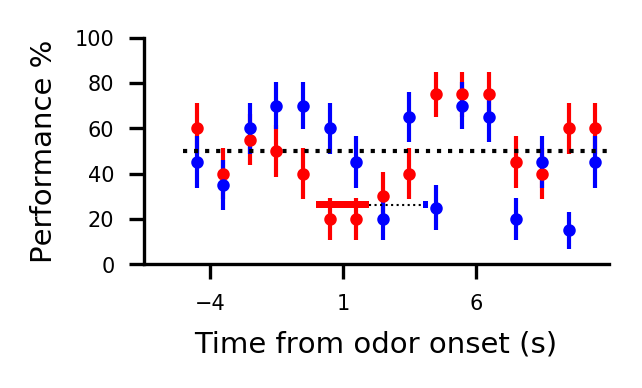

In [494]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
ax.plot(t+np.diff(t)[0]/2., scores_b_20.mean(1)*100, 'ro', lw=.5, zorder=19,ms=2)
m = scores_b_20.mean(1)*100
s = np.std(scores_b_20, 1)*100 / np.sqrt(scores_b_20.shape[1]-1)
ax.errorbar(t+np.diff(t)[0]/2., m, s, lw=0, zorder=0, color= 'r', elinewidth=1)

ax.plot(t+np.diff(t)[0]/2., scores_a_20.mean(1)*100, 'bo', lw=.5, zorder=19,ms=2)
m = scores_a_20.mean(1)*100
s = np.std(scores_a_20, 1)*100 / np.sqrt(scores_a_20.shape[1]-1)
ax.errorbar(t+np.diff(t)[0]/2., m, s, lw=0, zorder=0, color= 'b', elinewidth=1)

ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(t_start0+1, t_stop0, 5))
ax.hlines(50, t_start0, t_stop0, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')



# fig.savefig('img/proposal_decoding_timebased.svg')

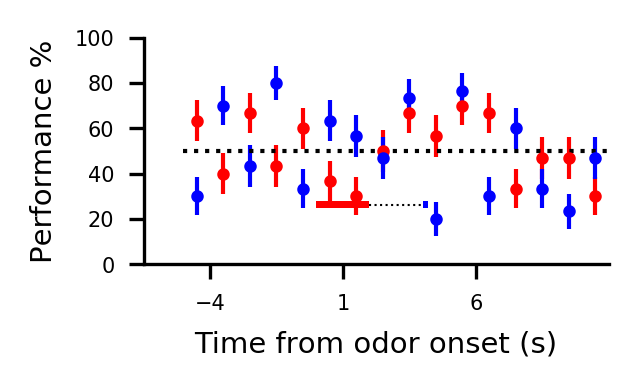

In [495]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
ax.plot(t+np.diff(t)[0]/2., scores_b_30.mean(1)*100, 'ro', lw=.5, zorder=19,ms=2)
m = scores_b_30.mean(1)*100
s = np.std(scores_b_30, 1)*100 / np.sqrt(scores_b_30.shape[1]-1)
ax.errorbar(t+np.diff(t)[0]/2., m, s, lw=0, zorder=0, color= 'r', elinewidth=1)

ax.plot(t+np.diff(t)[0]/2., scores_a_30.mean(1)*100, 'bo', lw=.5, zorder=19,ms=2)
m = scores_a_30.mean(1)*100
s = np.std(scores_a_30, 1)*100 / np.sqrt(scores_a_30.shape[1]-1)
ax.errorbar(t+np.diff(t)[0]/2., m, s, lw=0, zorder=0, color= 'b', elinewidth=1)

ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(t_start0+1, t_stop0, 5))
ax.hlines(50, t_start0, t_stop0, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [496]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

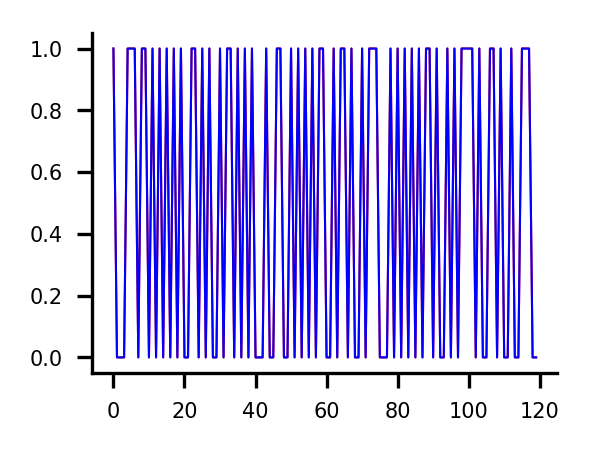

In [497]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
ax.plot(range(len(labels[0:120])), labels[0:120], lw=0.5,c='r')
ax.plot(range(len(labels[0:120])), labels[0:120], lw=0.5,c='b')


In [498]:
n_loops = 10

In [499]:
# %%time
# %%px

from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.svm import SVC, LinearSVC

# decoder = SVC(kernel='linear')
decoder = LinearSVC()
# decoder = MultinomialNB()

In [500]:
len(labels)

240

In [501]:
patterns_evs = ut.extract_patterns(cum_time_ax, cum_events, cum_cycles, vars_pre['CYCLE_START'], 0, vars_pre['CS_DURATION']+vars_pre['DELAY'])
#labels defined above

In [502]:
cum_cycles.shape

(240, 2)

In [503]:
%%time
scores = []
n_train = 30
n_test = 15
for i in range(len(labels)-n_train-n_test):
    which_train = range(i, i+n_train)
    which_test = range(i+1+n_train, i+1+n_train+n_test)
    decoder.fit(patterns_evs[which_train], labels[which_train])
    scores.append(decoder.score(patterns_evs[which_test], labels[which_test]))
scores = np.r_[scores]

CPU times: user 180 ms, sys: 0 ns, total: 180 ms
Wall time: 178 ms


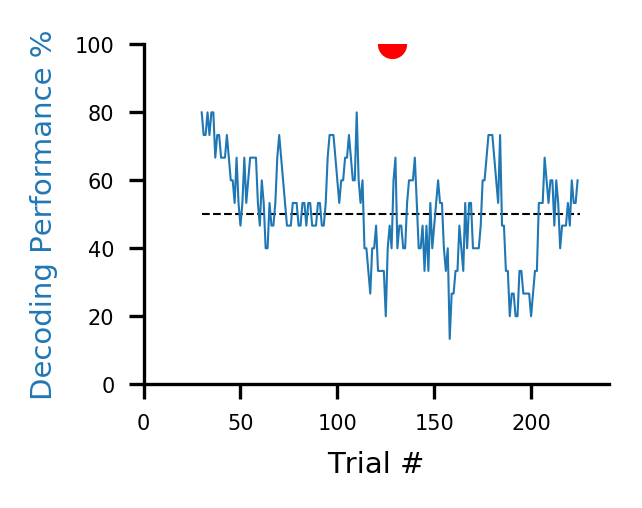

In [504]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
ax.plot(range(n_train, len(labels)-n_test), scores*100, lw=0.5)

ax.set_xlabel('Trial #')
ax.set_ylabel('Decoding Performance %', color='C0')
ax.set_ylim(0, 100)
ax.hlines(50, n_train, len(labels)-n_test, linestyles='dashed', color='k', lw=0.5, zorder=0)
ax.set_xlim(0, 240)

ax.patch.set_visible(False)

ax.plot(found_ind,100,'ro')

In [505]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'h5py'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
